In [1]:
import pandas_datareader
import matplotlib.pyplot as plt

In [2]:
pandas_datareader.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [3]:
start = '1926-01-01'

In [4]:
ff = pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq='M', start=start).read()
ff

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1926-07    2.96 -2.56 -2.43  0.22
 1926-08    2.64 -1.17  3.82  0.25
 1926-09    0.36 -1.40  0.13  0.23
 1926-10   -3.24 -0.09  0.70  0.32
 1926-11    2.53 -0.10 -0.51  0.31
 ...         ...   ...   ...   ...
 2024-08    1.61 -3.55 -1.13  0.48
 2024-09    1.74 -0.17 -2.59  0.40
 2024-10   -0.97 -1.01  0.89  0.39
 2024-11    6.51  4.63 -0.05  0.40
 2024-12   -3.17 -2.73 -2.95  0.37
 
 [1182 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1927   29.47  -2.04  -4.54  3.12
 1928   35.39   4.51  -6.17  3.56
 1929  -19.54 -30.70  11.67  4.75
 1930  -31.23  -5.17 -11.54  2.41
 1931  -45.11   3.70 -13.95  1.07
 ...      ...    ...    ...   ...
 2020   23.66  12.72 -46.10  0.45
 2021   23.57  -3.78  25.39  0.04
 2022  -21.58  -7.04  25.97  1.43
 2023   21.69  -3.28 -13.70  4.95
 2024   19.78 -11.13  -9.10  5.26
 
 [98 rows x 4 columns],
 'DESCR': 'F-F Research Data Factors\n-----

In [5]:
ff_df = ff[0]

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

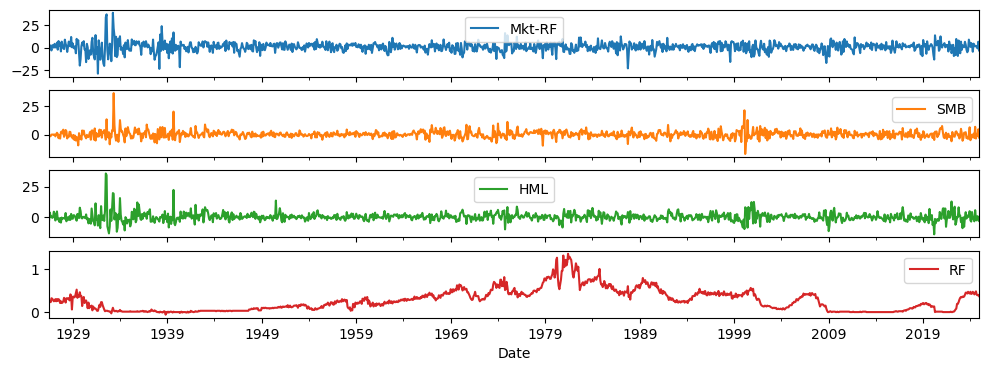

In [6]:
ff_df.plot(subplots=True, figsize=(12, 4))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

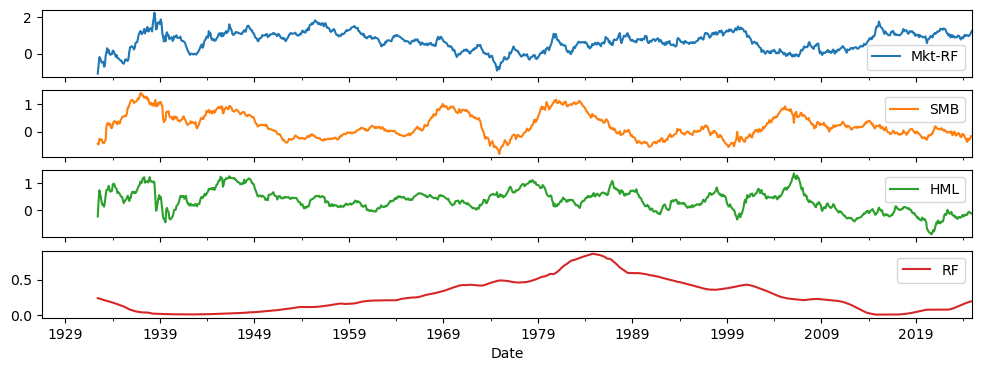

In [7]:
ff_df.rolling(72).mean().plot(subplots=True, figsize = (12,4))

In [8]:
ff_mom_df = pandas_datareader.famafrench.FamaFrenchReader('F-F_Momentum_Factor', freq='M', start=start).read()[0]

array([<Axes: xlabel='Date'>], dtype=object)

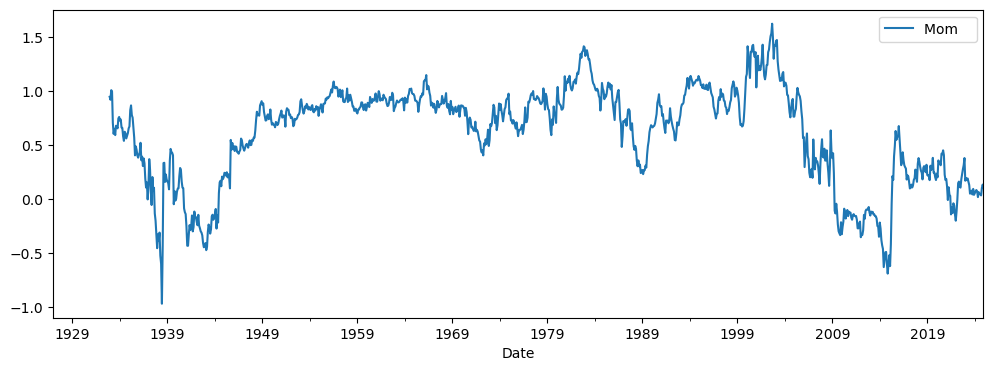

In [9]:
ff_mom_df.rolling(72).mean().plot(subplots=True, figsize=(12,4))

In [10]:
import pandas as pd
ffac_merged_df = pd.merge(ff_df,ff_mom_df, on='Date', how='inner', sort=True, copy=True, indicator=False, validate = 'one_to_one')
ffac_merged_df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.06,-0.37,4.54,0.25,0.36
1927-02,4.18,0.04,2.94,0.26,-2.14
1927-03,0.13,-1.65,-2.61,0.30,3.61
1927-04,0.46,0.30,0.81,0.25,4.30
1927-05,5.44,1.53,4.73,0.30,3.00
...,...,...,...,...,...
2024-08,1.61,-3.55,-1.13,0.48,4.79
2024-09,1.74,-0.17,-2.59,0.40,-0.60
2024-10,-0.97,-1.01,0.89,0.39,2.87


In [11]:
import yfinance as yf

# Fetch Apple stock data with original Close price
apple = yf.download('AAPL', start='2010-01-01', end='2023-12-31', auto_adjust=False)

# Display first few rows
print(apple.head())

[*********************100%***********************]  1 of 1 completed

Price      Adj Close     Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                                   
2010-01-04  6.440330  7.643214  7.660714  7.585000  7.622500  493729600
2010-01-05  6.451465  7.656429  7.699643  7.616071  7.664286  601904800
2010-01-06  6.348846  7.534643  7.686786  7.526786  7.656429  552160000
2010-01-07  6.337110  7.520714  7.571429  7.466071  7.562500  477131200
2010-01-08  6.379241  7.570714  7.571429  7.466429  7.510714  447610800


In [12]:
import pandas_datareader.data as pdr
import pandas_datareader.famafrench as ff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf

In [13]:
import pandas_datareader as pdr

# Fetch Fama-French 5-Factor data
ff5 = pdr.famafrench.FamaFrenchReader('F-F_Research_Data_5_Factors_2x3', freq='M').read()[0]
ff_mom = pdr.famafrench.FamaFrenchReader('F-F_Momentum_Factor', freq='M').read()[0]

print(ff5.head())
print(ff_mom.head())

         Mkt-RF   SMB    HML   RMW   CMA    RF
Date                                          
2020-03  -13.39 -8.24 -13.88 -1.56  1.26  0.13
2020-04   13.65  2.56  -1.34  2.73 -1.03  0.00
2020-05    5.58  1.99  -4.85  0.93 -3.24  0.01
2020-06    2.46  1.97  -2.23  0.13  0.53  0.01
2020-07    5.77 -3.18  -1.44  0.40  1.03  0.01
         Mom   
Date           
2020-03    7.96
2020-04   -5.26
2020-05    0.41
2020-06   -0.73
2020-07    7.59


In [14]:
datasets = ff.get_available_datasets()

In [15]:
ff5.rename(columns={'Mkt-RF': 'Market_Risk', 'SMB': 'Size', 'HML': 'Value', 'RMW': 'Profitability', 'CMA': 'Investment'}, inplace=True)
ff_mom.rename(columns={'Mom': 'Momentum'}, inplace=True)

In [16]:
# Merge FF5 and Momentum factor
ff_data = ff5.merge(ff_mom, left_index=True, right_index=True)
ff_data.head()

,Market_Risk,Size,Value,Profitability,Investment,RF,Mom
Date,,,,,,,
2020-03,-13.39,-8.24,-13.88,-1.56,1.26,0.13,7.96
2020-04,13.65,2.56,-1.34,2.73,-1.03,0.00,-5.26
2020-05,5.58,1.99,-4.85,0.93,-3.24,0.01,0.41
2020-06,2.46,1.97,-2.23,0.13,0.53,0.01,-0.73
2020-07,5.77,-3.18,-1.44,0.40,1.03,0.01,7.59


In [17]:
import yfinance as yf

start_date = '2000-01-01'
aapl = yf.download('AAPL', start=start_date, auto_adjust=False)['Adj Close']

# Convert to monthly returns
aapl_returns = aapl.resample('M').ffill().pct_change() * 100  

if isinstance(aapl_returns, pd.Series):
    aapl_df = aapl_returns.to_frame(name='AAPL_Return')  
else:
    aapl_df = aapl_returns  

aapl_df.columns = ['AAPL_Return']

print(aapl_df.head()) 

[*********************100%***********************]  1 of 1 completed

            AAPL_Return
Date                   
2000-01-31          NaN
2000-02-29    10.482008
2000-03-31    18.484214
2000-04-30    -8.651722
2000-05-31   -32.292136


In [18]:
# Ensure date formats match
aapl_df.index = aapl_df.index.strftime('%Y-%m')
ff_data.index = ff_data.index.strftime('%Y-%m')

# Merge datasets
merged_data = aapl_df.merge(ff_data, left_index=True, right_index=True).dropna()
merged_data['AAPL_Excess'] = merged_data['AAPL_Return'] - merged_data['RF']
merged_data.head()

,AAPL_Return,Market_Risk,Size,Value,Profitability,Investment,RF,Mom,AAPL_Excess
Date,,,,,,,,,
2020-03,-6.976125,-13.39,-8.24,-13.88,-1.56,1.26,0.13,7.96,-7.106125
2020-04,15.537411,13.65,2.56,-1.34,2.73,-1.03,0.00,-5.26,15.537411
2020-05,8.509384,5.58,1.99,-4.85,0.93,-3.24,0.01,0.41,8.499384
2020-06,14.738633,2.46,1.97,-2.23,0.13,0.53,0.01,-0.73,14.728633
2020-07,16.513162,5.77,-3.18,-1.44,0.40,1.03,0.01,7.59,16.503162


In [19]:
# Define independent and dependent variables
X = merged_data[['Market_Risk', 'Size', 'Value', 'Profitability', 'Investment', 'Mom   ']]
y = merged_data['AAPL_Excess']

# Add constant term for intercept
X = sm.add_constant(X)

# Run OLS regression
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            AAPL_Excess   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     18.17
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           3.81e-11
Time:                        08:56:08   Log-Likelihood:                -171.42
No. Observations:                  58   AIC:                             356.8
Df Residuals:                      51   BIC:                             371.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7041      0.698      1.008

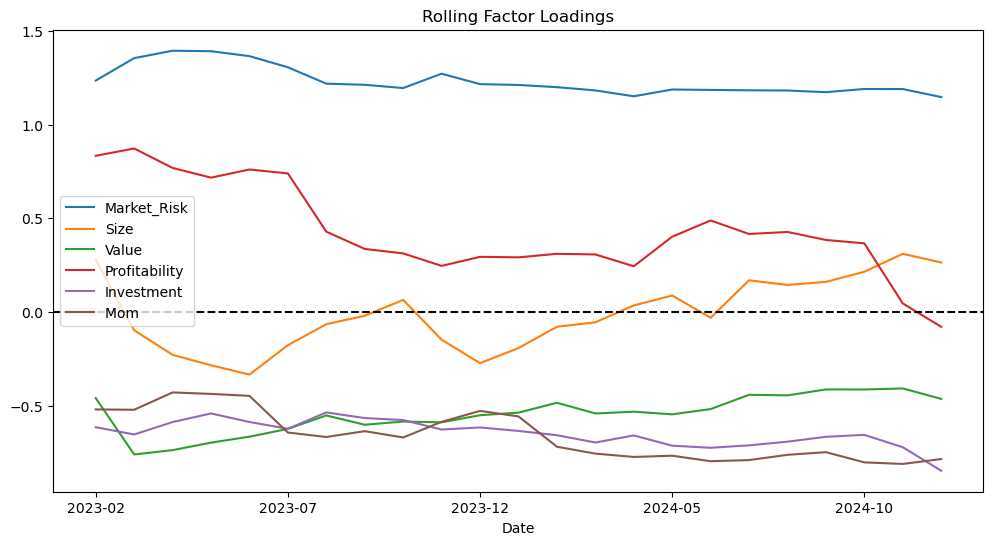

In [20]:
rolling_window = 36
rolling_betas = X.rolling(rolling_window).apply(lambda x: sm.OLS(y.loc[x.index], x).fit().params)

rolling_betas.drop(columns=['const']).plot(figsize=(12,6), title="Rolling Factor Loadings")
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

In [21]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
start_date = '2000-01-01'

prices = yf.download(tickers, start=start_date, auto_adjust=False)['Adj Close']
monthly_returns = prices.resample('M').ffill().pct_change() * 100  # Convert to monthly returns

stock_returns = monthly_returns.dropna()
stock_returns.head()

[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2010-07-31,2.274057,7.898590,8.967302,12.168605,-16.324005
2010-08-31,-5.500484,5.886846,-7.183660,-8.581155,-2.306871
2010-09-30,16.721530,25.819119,16.837022,4.345986,4.774129
2010-10-31,6.072270,5.201836,16.719607,8.901610,7.006342
2010-11-30,3.378955,6.155058,-9.449247,-4.704892,61.767386


In [22]:
stock_returns.index = pd.to_datetime(stock_returns.index)
ff_data.index = pd.to_datetime(ff_data.index)

# Convert index to YYYY-MM format for merging
stock_returns.index = stock_returns.index.strftime('%Y-%m')
ff_data.index = ff_data.index.strftime('%Y-%m')

# Merge stock returns with factor data
merged_data = stock_returns.merge(ff_data, left_index=True, right_index=True).dropna()

# Compute excess returns
for stock in tickers:
    merged_data[f'{stock}_Excess'] = merged_data[stock] - merged_data['RF']

merged_data.head()


,AAPL,AMZN,GOOGL,MSFT,TSLA,Market_Risk,Size,Value,Profitability,Investment,RF,Mom,AAPL_Excess,MSFT_Excess,GOOGL_Excess,AMZN_Excess,TSLA_Excess
Date,,,,,,,,,,,,,,,,,
2020-03,-6.976131,3.502057,-13.238758,-2.654171,-21.555707,-13.39,-8.24,-13.88,-1.56,1.26,0.13,7.96,-7.106131,-2.784171,-13.368758,3.372057,-21.685707
2020-04,15.537381,26.890012,15.899989,13.632630,49.213732,13.65,2.56,-1.34,2.73,-1.03,0.00,-5.26,15.537381,13.632630,15.899989,26.890012,49.213732
2020-05,8.509397,-1.278494,6.446879,2.539099,6.793887,5.58,1.99,-4.85,0.93,-3.24,0.01,0.41,8.499397,2.529099,6.436879,-1.288494,6.783887
2020-06,14.738656,12.956673,-1.079175,11.055958,29.318563,2.46,1.97,-2.23,0.13,0.53,0.01,-0.73,14.728656,11.045958,-1.089175,12.946673,29.308563
2020-07,16.513153,14.711362,4.929306,0.737045,32.501088,5.77,-3.18,-1.44,0.40,1.03,0.01,7.59,16.503153,0.727045,4.919306,14.701362,32.491088


In [23]:
# Run regressions for each stock to get factor betas
betas = {}
for stock in tickers:
    X = merged_data[['Market_Risk', 'Size', 'Value', 'Profitability', 'Investment', 'Mom   ']]
    y = merged_data[f'{stock}_Excess']
    X = sm.add_constant(X)
    
    model = sm.OLS(y, X).fit()
    betas[stock] = model.params

# Convert to DataFrame
betas_df = pd.DataFrame(betas).T
print(betas_df)

          const  Market_Risk      Size     Value  Profitability  Investment  \
AAPL   0.704128     1.162351  0.115910 -0.809811       0.548392    0.485742   
MSFT   0.476875     0.963106 -0.471104 -0.452582       0.130867    0.092306   
GOOGL  1.075627     0.832020 -0.763723  0.142553      -0.180642   -0.648731   
AMZN   1.009022     1.130742 -0.686623 -0.558767      -0.824529   -0.455075   
TSLA   3.745458     2.158678  1.016982 -1.347007      -0.442266   -0.361709   

         Mom     
AAPL  -0.054181  
MSFT  -0.024450  
GOOGL -0.583643  
AMZN  -0.352895  
TSLA  -0.367842  


In [24]:
from scipy.optimize import minimize

# Compute covariance matrix of excess returns
cov_matrix = merged_data[[f'{stock}_Excess' for stock in tickers]].cov()

# Define portfolio optimization function
def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))  # Portfolio volatility

# Constraints: Weights sum to 1, all weights between 0 and 1
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
bounds = [(0, 1)] * len(tickers)

# Initial weights (equal allocation)
initial_weights = np.array([1 / len(tickers)] * len(tickers))

# Optimize portfolio (minimize volatility)
optimal_weights = minimize(portfolio_volatility, initial_weights, args=(cov_matrix,), 
                           method='SLSQP', bounds=bounds, constraints=constraints).x

# Display results
portfolio_weights = pd.Series(optimal_weights, index=tickers)
print("Optimal Portfolio Allocation:")
print(portfolio_weights)

Optimal Portfolio Allocation:
AAPL     9.364402e-02
MSFT     6.674087e-01
GOOGL    2.389472e-01
AMZN     0.000000e+00
TSLA     8.083497e-16
dtype: float64


In [25]:
if 'Market_Risk' in merged_data.columns:
    merged_data['Benchmark_Return'] = merged_data['Market_Risk']
else:
    print("No suitable benchmark column found!")

In [26]:
# Compute Portfolio Returns
merged_data['Portfolio_Return'] = merged_data[[f'{stock}_Excess' for stock in tickers]].dot(portfolio_weights.values)

# Now compute cumulative returns
merged_data['Cumulative_Portfolio'] = (1 + merged_data['Portfolio_Return'] / 100).cumprod()
merged_data['Cumulative_Benchmark'] = (1 + merged_data['Benchmark_Return'] / 100).cumprod()

In [27]:
# Function to calculate Sharpe Ratio
def sharpe_ratio(returns, risk_free_rate=0.02):  # 2% annualized risk-free rate
    excess_returns = returns - risk_free_rate / 12
    return np.mean(excess_returns) / np.std(excess_returns) * np.sqrt(12)

In [28]:
# Function to calculate Sortino Ratio
def sortino_ratio(returns, risk_free_rate=0.02):
    excess_returns = returns - risk_free_rate / 12
    downside_returns = excess_returns[excess_returns < 0]
    return np.mean(excess_returns) / np.std(downside_returns) * np.sqrt(12)

In [29]:
# Function to calculate Maximum Drawdown
def max_drawdown(cumulative_returns):
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

In [30]:
# Calculate performance metrics
portfolio_sharpe = sharpe_ratio(merged_data['Portfolio_Return'])
portfolio_sortino = sortino_ratio(merged_data['Portfolio_Return'])
portfolio_max_drawdown = max_drawdown(merged_data['Cumulative_Portfolio'])

In [31]:
# Print performance metrics
print("Portfolio Performance Metrics:")
print(f"Sharpe Ratio: {portfolio_sharpe:.2f}")
print(f"Sortino Ratio: {portfolio_sortino:.2f}")
print(f"Max Drawdown: {portfolio_max_drawdown:.2%}")

Portfolio Performance Metrics:
Sharpe Ratio: 1.03
Sortino Ratio: 1.93
Max Drawdown: -31.46%


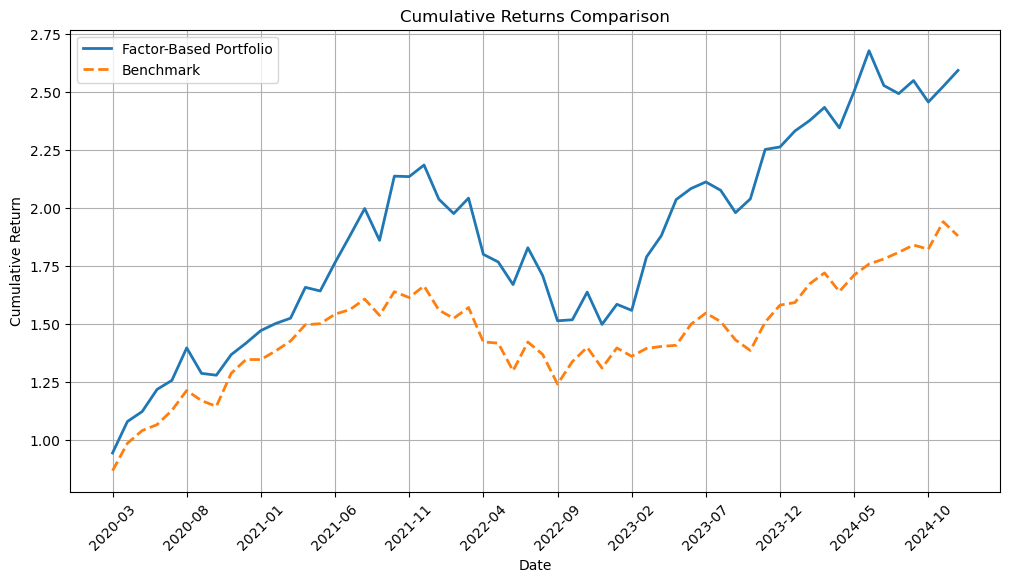

In [32]:
# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, merged_data['Cumulative_Portfolio'], label='Factor-Based Portfolio', linewidth=2)
plt.plot(merged_data.index, merged_data['Cumulative_Benchmark'], label='Benchmark', linestyle='--', linewidth=2)
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()

plt.xticks(rotation=45) 
plt.xticks(merged_data.index[::5]) 

plt.show()